<h1><b>Выявление закономерностей, определяющих успешность игры </b><h1>

<div style="border:solid green 2px; padding: 20px">
 
<b>Что у нас есть</b><br>
 Данные до 2016 года о продажах игр, оценки пользователей и экспертов, жанры и платформы интернет-магазина «Стримчик».<br><br>
<b>Что требуется сделать?</b><br>
   Выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
    
</div>

<h1>Описание данных:</h1>
<br>
<ul>
<li><i>Name </i> — название игры</li>
<li><i>Platform </i> — платформа</li>
<li><i>Year_of_Release </i> —  год выпуска</li>
<li><i>Genre</i> — жанр игры</li>
<li><i>NA_sales</i> —  продажи в Северной Америке(млн)</li>
<li><i>EU_sales</i> — продажи в Европе(млн)</li>
<li><i>JP_sales</i> — продажи в Японии(млн)</li>
<li><i>Other_sales</i> — продажи в других странах(млн)</li>
<li><i>Critic_Score</i> — оценка критиков (максимум 100)</li>
<li><i>User_Score</i> —  оценка пользователей (максимум 10)</li>
<li><i>Rating</i> —  рейтинг от организации ESRB (возрастная категория).</li>
</ul>
<br>

</ul>

## Подготовка и изучение данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<b>Приведение названий столбцов к к нижнему регистру</b>

In [3]:
data = data.rename(columns = {'Name': 'name', 'Platform': 'platform', 'Year_of_Release': 'year_of_release', 'Genre': 'genre', 'NA_sales': 'na_sales', 'EU_sales': 'eu_sales', 'JP_sales': 'jp_sales', 'Other_sales': 'other_sales', 'Critic_Score': 'critic_score', 'User_Score': 'user_score', 'Year_of_Release': 'year_of_release', 'Rating': 'rating'})

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Работа с пропусками

In [5]:
data.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

В столбце <b>year_of_release</b> 269 пропусков

In [6]:
data[data['rating'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [7]:
data['year_of_release'] = data['year_of_release'].fillna(0)

Заменим пропуски на 0, так как нет возможности заполнить их корректными данными, они неизвесны

В столбце <b>name</b> 2 пропуска<br>удалим эти строки как как понимо пропуска в name, там пропуски в столбцах critic_score, user_score, rating - а без этих данных вообще нет смысла учитывать их в нашей работе

In [8]:
data = data.loc[data['name'].notnull()]

В столбце <b>rating</b> 6764 пропуска

In [9]:
data['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

<ul>
<li><b>E</b> - подходит для всех возрастов</li>
<li><b>T</b> - от 13 лет и старше</li>
    <li><b>M</b> - 17 лет и старше</li>
    <li><b>E10+</b> - от 10 лет и старше</li>
    <li><b>EC</b> - не используется с 2018 года. Раньше обозначал дошкольную аудиторию</li>
    <li><b>RP</b> - не присвоен окончательный рейтинг (вероятно получить рейтинг М)</li>
    <li><b>K-A</b> - от 6 лет и старше</li>
    <li><b>AO</b> - старше 18 лет</li>
</ul>

Заменим отсутствубщие в этом столбце значения на RP - не присвоен окончательный рейтинг.

In [10]:
data.loc[data['rating'].isnull(), 'rating'] = 'RP'

В столбце <b>critic_score</b> 8576 пропусков


Заменим пропуски на 0, так как нет возможности заполнить их корректными данными, они неизвесны

In [11]:
data['critic_score'] = data['critic_score'].fillna(0)

В столбце <b>user_score</b> 6699 пропусков

В этом столбце есть значение tbd(2424), что означает To Be Determined (будет определено). Значит пользователь еще не указал свою оценку<br>
Заменим это значение на число отличное от шкалы (например, 11), чтобы можно было тип этого столбца изменить на число и потом при анализе знать, что это за значение

In [12]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = '0'

Заменим пропуски на 0, так как нет возможности заполнить их корректными данными, они неизвесны

In [13]:
data['user_score'] = data['user_score'].fillna(0)

## Изменение типов данных

<b>Типы данных:</b>
<br>
<ul>
<li><i>name </i> — поле типа текст, оставляем без изменений </li>
<li><i>platform </i> — поле типа текст, оставляем без изменений</li>
<li><i>year_of_release </i> —  <b>изменим на целочисленное, так как году ни к чему дробная часть</b></li>
<li><i>genre</i> — поле типа текст, оставляем без изменений</li>
<li><i>na_sales</i> —  число с плавающей точкой, оставляем без изменений</li>
<li><i>eu_sales</i> — число с плавающей точкой, оставляем без изменений</li>
<li><i>jp_sales</i> — число с плавающей точкой, оставляем без изменений</li>
<li><i>other_sales</i> — число с плавающей точкой, оставляем без изменений</li>
<li><i>critic_score</i> — <b>изменим на целочисленное, так как со всем датасете значения в этом столбце имеют дробную часть 0</b></li>
<li><i>user_score</i> —  <b>изменим на число с плавающей точкой</b></li>
<li><i>rating</i> —  поле типа текст, оставляем без изменений</li>
</ul>
<br>

</ul>

In [14]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [15]:
data['year_of_release'] = data['year_of_release'].astype('int')

In [16]:
data['critic_score'] = data['critic_score'].astype('int')

In [17]:
data['user_score'] = data['user_score'].astype('float64')

<b>Подсчет суммарных продаж во всех регионах</b>

In [18]:
data['total_sales'] = data['eu_sales'] + data['na_sales']  + data['jp_sales'] + data['other_sales']

## Проведение исследовательского анализа данных

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

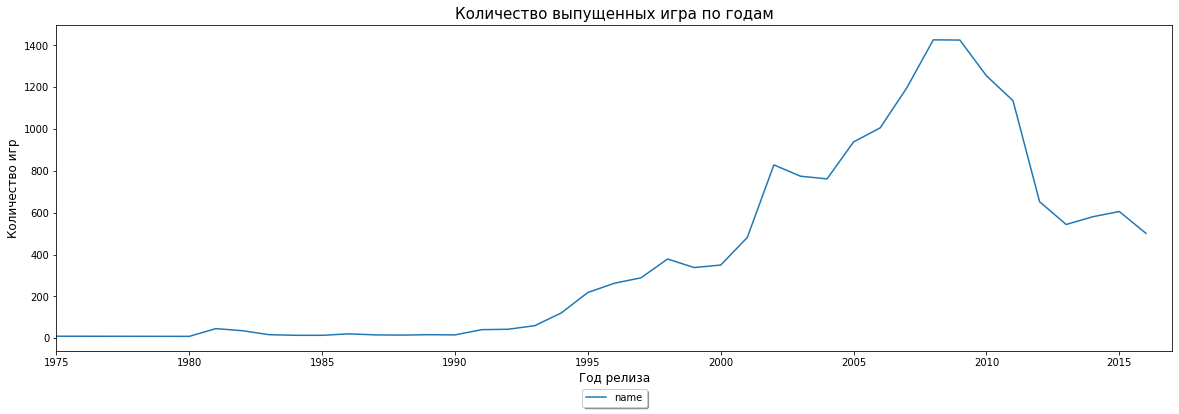

In [19]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(figsize=(20, 6), xlim=(1975, 2017))
plt.title('Количество выпущенных игра по годам', size=15)

plt.xlabel('Год релиза', size=12)
plt.ylabel('Количество игр', size=12)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)

plt.show()

Видим, что с 2004 года был рост количества выпущенных игр, который продолжался до 2009. После 2009 видим падение и снижение количества выпушенных игр

Как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [20]:
data.pivot_table(index='year_of_release',columns = 'platform', values='total_sales', aggfunc='sum')

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,10.50,NaN,1.19,NaN,3.34,1.03,4.97,2.20,NaN,NaN,0.67,NaN,NaN,3.76,NaN,3.28,22.21,8.31,NaN,4.52,0.26,NaN,NaN,NaN,NaN,NaN,16.33,NaN,10.18,6.17,NaN
1980,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,0.45,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,53.44,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


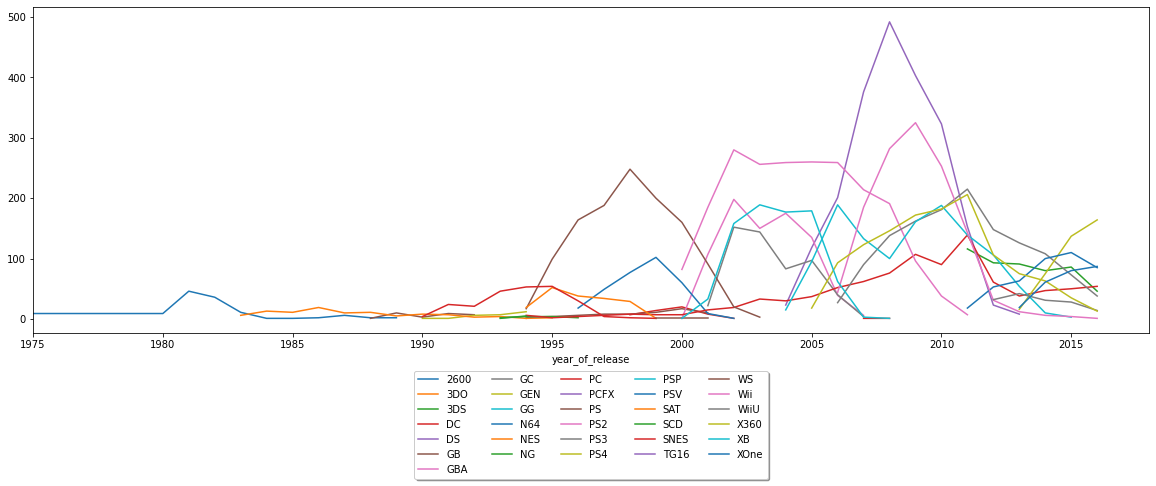

In [21]:
data.pivot_table(index='year_of_release',columns = 'platform', values='name', aggfunc='count').plot(figsize=(20, 6), xlim=(1975, 2018))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)

plt.show()

Какой-то характерный срок появления новых платформ и исчезновения старых назвать сложно, так как срок всегда разный. <br>
Приблизительно это 10 лет.<br>
"PC" - платформа долгожитель (по данным датасета - 26 лет)

Определим <b>актуальный период</b>:

In [22]:
actual_data = data.query('(2017 - year_of_release) < 5')

actual_data - датафрейм, содержащий данные, где
на 2017 год попадает только первая половина срока жизни платформы

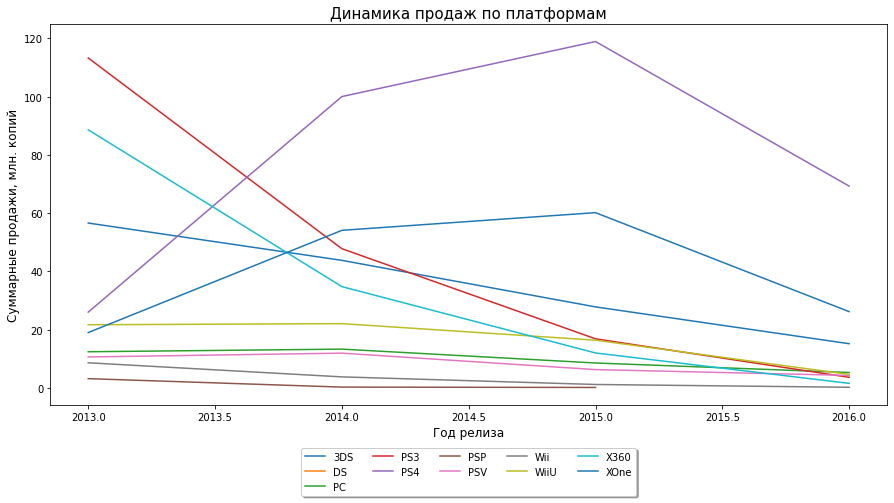

In [23]:
actual_data.query('year_of_release >= 2010').pivot_table(index='year_of_release',columns = 'platform', values='total_sales', aggfunc='sum').plot(figsize=(15, 7))

plt.title('Динамика продаж по платформам', size=15)

plt.xlabel('Год релиза', size=12)
plt.ylabel('Суммарные продажи, млн. копий', size=12)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)

plt.show()

<b>Диаграмма размаха</b> по глобальным продажам игр в разбивке по платформам

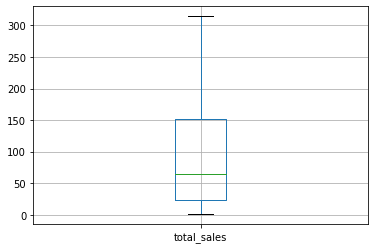

In [24]:
actual_data.query('year_of_release >= 2010').pivot_table(index='platform', values='total_sales', aggfunc='sum').boxplot();

In [25]:
actual_data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by=["total_sales"])

,total_sales
platform,
DS,1.54
PSP,3.50
Wii,13.66
PSV,32.99
PC,39.43
WiiU,64.63
X360,136.80
3DS,143.25
XOne,159.32


<b>Анализ диаграммы размаха</b>:<br>
Медиана приблизительно равна 70.<br>
Нижний «ус» чуть больше 1 - это минимальное значение.<br>
Верхний заканчивается около 310 — это 1,5 межквартильного размаха, добавленного к 3-му квартилю.<br>
Это ориентировочная граница нормального размаха.<br>
Всё, что лежит за ней, считается выбросом, выбросов на нашнм графике не наблюдается

<b>Влияние отзывов на продажи</b><br>
Рассмотрим на примере платформы PS3<br>
Построим диаграмму рассеивания и посчитаем корреляцию между отзывами и продажами

<b>critic_score</b>

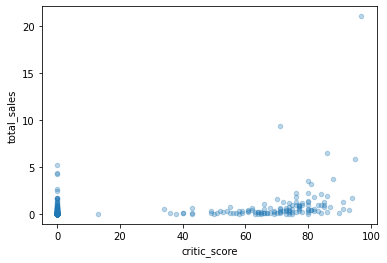

In [26]:
actual_data.query('platform == "PS3"').plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3);

In [27]:
actual_data.query('platform == "PS3"')['critic_score'].corr(data.query('platform == "PS3"')['total_sales'])

0.279274363232472

<b>Вывод:</b> корреляция (рост продаж с увеличением оценок критиков) есть, но она слабая.

<b>user_score</b>

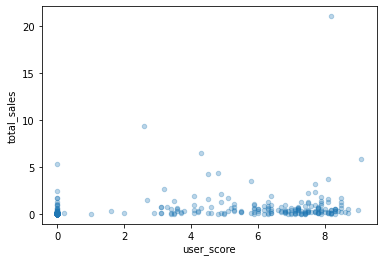

In [28]:
actual_data.query('platform == "PS3"').plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3);

In [29]:
actual_data.query('platform == "PS3"')['user_score'].corr(data.query('platform == "PS3"')['total_sales'])

0.20209116183305223

<b>Вывод:</b> корреляции между оценкой пользователей и продажами не наблюдается

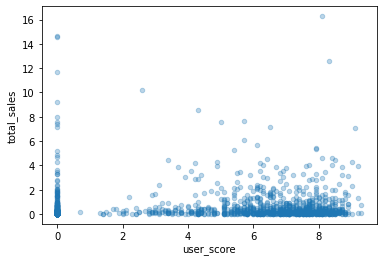

In [30]:
actual_data.query('platform != "PS3"').plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3);

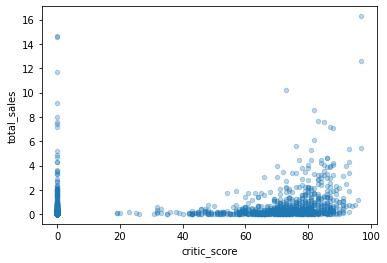

In [31]:
actual_data.query('platform != "PS3"').plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3);

На других платформах также нет корреляции оценнок и критиков, и зрителей с суммами продаж

<b>Распределение игр по жанрам</b>

In [32]:
actual_data.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by=["total_sales"], ascending=False)

,total_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


<b><i>самые прибыльные жанры</i>:</b>
<ul>
    <li>Action</li>
    <li>Shooter</li>
    <li>Sports</li>
    <li>Role-Playing</li>
</ul><br>
<b><i>жанры с самыми низкими продажами</i>:</b>
<ul>
    <li>Puzzle</li>
    <li>Strategy</li>
    <li>Simulation</li>
</ul><br>
<b>Жанры с самыми высокими и с самыми низкими продажами отличаются в 100 раз</b>

## Портрет пользователя каждого региона

регион <b>NA (Северная Америка)</b>

In [33]:
actual_data.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by=["na_sales"])

,na_sales
platform,
PSP,0.00
DS,0.57
PSV,5.04
Wii,6.56
PC,11.11
WiiU,29.21
3DS,38.20
PS3,63.50
X360,81.66


<b><i>Самые популярные платформы (топ-5) в Северной Америке</i>:</b>
<ul>
    <li><b>PS4</b> - 108.74</li>
    <li><b>XOne</b> - 93.12</li>
    <li><b>X360</b>	- 81.66</li>
    <li><b>PS3</b> - 63.50</li>
     <li><b>3DS</b> - 38.20</li>
</ul><br>

In [34]:
actual_data.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by=["na_sales"])

,na_sales
genre,
Puzzle,0.83
Strategy,3.28
Simulation,4.86
Adventure,7.14
Racing,12.96
Fighting,15.55
Platform,18.14
Misc,27.49
Role-Playing,46.40


<b><i>Самые популярные жанры (топ-5) в Северной Америке</i>:</b>
<ul>
    <li><b>Action</b> - 126.05</li>
    <li><b>Shooter</b> - 109.74</li>
    <li><b>Sports</b>	- 65.27</li>
    <li><b>Role-Playing</b> - 46.40</li>
     <li><b>Misc</b> - 27.49</li>
</ul><br>

In [35]:
actual_data.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by=["na_sales"])

,na_sales
rating,
T,49.79
E10+,54.24
E,79.05
RP,89.42
M,165.21


<b><i>Самые высокие продажи в Северной Америке у  рейтинга ESRB </i>:</b>
<ul>
    <li><b>M</b> - 165.21</li>
    <li><b>RP</b> - 89.42</li>
    <li><b>E</b>	- 79.05</li>
    <li><b>E10+</b> - 54.24</li>
     <li><b>T</b> - 49.79</li>
</ul><br>
Жанры игр с рейтингом <b>M</b> имеют самую большую сумму продаж, очевидно, из-за того, что охватывают  большую категорию пользователей (M - 17 лет и старше)
Жанр <b>RP</b> по той же причине, окончательный рентинг не присвоен, поэтому так же аудитория будет максимально большой

регион <b>EU (Европа)</b>

In [36]:
actual_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by=["eu_sales"])

,eu_sales
platform,
PSP,0.17
DS,0.85
Wii,5.93
PSV,6.10
WiiU,19.85
PC,25.36
3DS,30.96
X360,42.52
XOne,51.59


<b><i>Самые популярные платформы (топ-5) в Европе</i>:</b>
<ul>
    <li><b>PS4</b> - 141.09</li>
    <li><b>PS3</b> - 67.81</li>
    <li><b>XOne</b>	- 51.59</li>
    <li><b>X360</b> - 42.52</li>
     <li><b>3DS</b> - 30.96</li>
</ul><br>

In [37]:
actual_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by=["eu_sales"])

,eu_sales
genre,
Puzzle,1.00
Strategy,4.22
Adventure,8.25
Fighting,8.55
Simulation,10.92
Platform,15.58
Misc,20.04
Racing,20.19
Role-Playing,36.97


<b><i>Самые популярные жанры (топ-5) в Европе</i>:</b>
<ul>
    <li><b>Action</b> - 118.13</li>
    <li><b>Shooter</b> - 87.86</li>
    <li><b>Sports</b> - 60.52</li>
    <li><b>Role-Playing</b> - 36.97</li>
     <li><b>Racing</b> - 20.19</li>
</ul><br>

In [38]:
actual_data.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by=["eu_sales"])

,eu_sales
rating,
T,41.95
E10+,42.69
RP,78.91
E,83.36
M,145.32


<b><i>Самые высокие продажи в Европе у  рейтинга ESRB </i>:</b>
<ul>
    <li><b>M</b> - 145.32</li>
    <li><b>E</b> - 83.36</li>
    <li><b>RP</b>	- 78.91</li>
    <li><b>E10+</b> - 42.69</li>
     <li><b>T</b> - 41.95</li>
</ul><br>
Жанры игр с рейтингом <b>M</b> имеют самую большую сумму продаж, очевидно, из-за того, что охватывают  большую категорию пользователей (M - 17 лет и старше)
Жанр <b>Е</b> по той же причине, охватывает все возрасты, поэтому так же аудитория будет максимально большой

регион <b>JP (Япония)</b>

In [39]:
actual_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by=["jp_sales"])

,jp_sales
platform,
DS,0.00
PC,0.00
Wii,0.05
XOne,0.34
X360,0.51
PSP,3.29
WiiU,10.88
PS4,15.96
PSV,18.59


<b><i>Самые популярные платформы (топ-5) в Японии</i>:</b>
<ul>
    <li><b>3DS</b> - 67.81</li>
    <li><b>PS3</b> - 23.35</li>
    <li><b>PSV</b>	- 18.59</li>
    <li><b>PS4</b> - 15.96</li>
     <li><b>WiiU</b> - 10.88</li>
</ul><br>

In [40]:
actual_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by=["jp_sales"])

,jp_sales
genre,
Puzzle,1.18
Strategy,1.77
Racing,2.30
Simulation,4.52
Platform,4.79
Sports,5.41
Adventure,5.82
Shooter,6.61
Fighting,7.65


<b><i>Самые популярные жанры (топ-5) в Японии</i>:</b>
<ul>
    <li><b>Role-Playing</b> - 10.88</li>
    <li><b>Action</b> - 40.49</li>
    <li><b>Misc</b>	- 9.20</li>
    <li><b>Fighting</b> - 7.65</li>
     <li><b>Shooter</b> - 6.61</li>
</ul><br>

In [41]:
actual_data.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by=["jp_sales"])

,jp_sales
rating,
E10+,5.89
M,14.11
E,15.14
T,20.59
RP,85.05


<b><i>Самые высокие продажи в Японии у  рейтинга ESRB </i>:</b>
<ul>
    <li><b>RP</b> - 85.05</li>
    <li><b>T</b> - 20.59</li>
    <li><b>E</b> - 15.14</li>
    <li><b>M</b> - 14.11</li>
     <li><b>E10+</b> - 5.89</li>
</ul><br>
Жанры игр с рейтингом <b>RP</b> имеют самую большую сумму продаж, очевидно, из-за того, что окончательный рентинг не присвоен, поэтому аудитория будет большой<br>
Жанр <b>T</b> 13 лет и старше

<b>Общий вывод по заданию:</b>


<div style="border:solid green 2px; padding: 20px">
<b><i>Самые популярные платформы во всех трех регионах</i>:</b><br>
    <br>
<table style="width:70%">
  <tr>
    <th>Название платформы</th>
    <th>Топ 5 по региону Северная Америка</th>
    <th>Топ 5 по региону Европа</th>
     <th>Топ 5 по региону Япония</th>
  </tr>
  <tr>
     <td>PS4</td>
    <td>+</td>
    <td>+</td>
      <td>+</td>
  </tr>
  <tr>
    <td>Xone</td>
    <td>+</td>
    <td>+</td>
      <td>-</td>
  </tr>
  <tr>
    <td>X360</td>
    <td>+</td>
    <td>+</td>
      <td>-</td>
  </tr>
   <tr>
     <td>PS3</td>
    <td>+</td>
    <td>+</td>
       <td>+</td>
  </tr>
       <tr>
    <td>3DS</td>
    <td>+</td>
    <td>+</td>
    <td>+</td>
  </tr>
  <tr>
    <td>PSV</td>
    <td>-</td>
    <td>-</td>
      <td>+</td>
    </tr>
      <tr>
    <td>WiiU</td>
    <td>-</td>
    <td>-</td>
    <td>+</td>
  </tr>
</table> 
<br>
    <b><i>Самые популярные жанры во всех трех регионах</i>:</b><br>
    <table style="width:70%">
  <tr>
    <th>Название жанра</th>
    <th>Топ 5 по региону Северная Америка</th>
    <th>Топ 5 по региону Европа</th>
     <th>Топ 5 по региону Япония</th>
  </tr>
  <tr>
     <td>Action</td>
    <td>+</td>
    <td>-</td>
      <td>+</td>
  </tr>
  <tr>
    <td>Sports</td>
    <td>+</td>
    <td>+</td>
      <td>-</td>
  </tr>
  <tr>
    <td>Shooter</td>
    <td>+</td>
    <td>+</td>
      <td>+</td>
  </tr>
   <tr>
     <td>Fighting</td>
    <td>-</td>
    <td>-</td>
       <td>+</td>
  </tr>
       <tr>
    <td>Misk</td>
    <td>+</td>
    <td>+</td>
    <td>+</td>
  </tr>
  <tr>
    <td>Racing</td>
    <td>-</td>
    <td>+</td>
      <td>-</td>
    </tr>
      <tr>
    <td>Role-Playing</td>
    <td>+</td>
    <td>+</td>
    <td>+</td>
  </tr>
</table>
    <br>
   <b><i>Самые популярные рейтинги ESRB во всех трех регионах совпадают</i>:</b><br>
    <ul>
       <li><b>RP</b></li>
    <li><b>E</b></li>
    <li><b>T</b></li>
    <li><b>M</b></li>
     <li><b>E10+</b></li>
    </ul>
</div>

Перед разработкой игры для получения от её продажи максимальной прибыли необходимо исходить из того, в каком регионе планируется ее реализовывать так как от этого напрямую зависит жанр и платформа. 

## Проверка гипотез

Сравниваемые выборки ген совокупности не очень большие они без проблем помещаются в оперативную память компьютера, поэтому можно просто рассчитать их средние и сравнить между собой без всяких статистических тестов.
Чем сейчас и займемся		


alpha = 0.05

<b>Проверка 1</b><br>
<b>Нулевая гипотеза:</b> средний пользовательский рейтинг платформ Xbox One и PC одинаковый<br>
<b>Альтернативная гипотеза:</b> средний пользовательский рейтинг платформ Xbox One и PC не одинаковый

In [42]:
actual_data.query('user_score != 0 & platform == "XOne"')['user_score'].mean()

6.521428571428572

In [43]:
actual_data.query('user_score != 0 & platform == "PC"')['user_score'].mean()

6.2696774193548395

In [44]:
alpha =  .05

results = st.ttest_ind(
    actual_data.query('user_score != 0 & platform == "XOne"')['user_score'], 
    actual_data.query('user_score != 0 & platform == "PC"')['user_score']) 

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")

else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Отвергаем нулевую гипотезу, о том что пользовательский рейтинг платформ Xbox One и PC одинаковый

<b>Проверка 2</b><br>
<b>Нулевая гипотеза:</b> Средние пользовательские рейтинги жанров Action и Sports разные<br>
<b>Альтернативная гипотеза:</b> Средние пользовательские рейтинги жанров Action и Sports не отличаются

In [45]:
actual_data.query('user_score != 0 & genre == "Action"')['user_score'].mean()

6.837532133676092

In [46]:
actual_data.query('user_score != 0 & genre == "Sports"')['user_score'].mean()

5.238124999999999

In [47]:
alpha =  .05

results = st.ttest_ind(
    actual_data.query('user_score != 0 & genre == "Action"')['user_score'], 
    actual_data.query('user_score != 0 & genre == "Sports"')['user_score']) 

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")

else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


## Общий вывод

Перед разработкой игры, перед запуском рекламной компании уже существующей игры, или для получения от её продажи максимальной прибыли необходимо исходить из того, в каком регионе планируется ее реализовывать так как от этого напрямую зависит жанр и платформа.<br><br>
Во всех трех регионах популярны платформы PS4, PS3, 3DS.<br>
Если планируется запуск игры только на регион Япония, то помимо вышеперечисленных популярны платформы WiiU, PSV.<br>
В Европе и Северной Америке помимо вышеперечисленных - Xone, X360

<br> Жанры: Во всех трех регионах наиболее прибыльные это Shooter, Role-Playing, Misk	<br> Для Японии, помимо вышеперечисленных попелярны жанры Aciton и Fighting <br> Для Северной Америки Action, Sports <br> Для Европы - Racing и Sports